# Виконав Лабунський Петро

### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Завдання
## 1. Збільшити датасет
1.1 Отримати список зображень у директорії "./assignemnts/dataset"

['image_0001.jpg', 'image_0002.jpg', 'image_0003.jpg', 'image_0004.jpg', 'image_0005.jpg', 'image_0006.jpg', 'image_0007.jpg', 'image_0008.jpg', 'image_0009.jpg', 'image_0010.jpg', 'test_img.jpg']


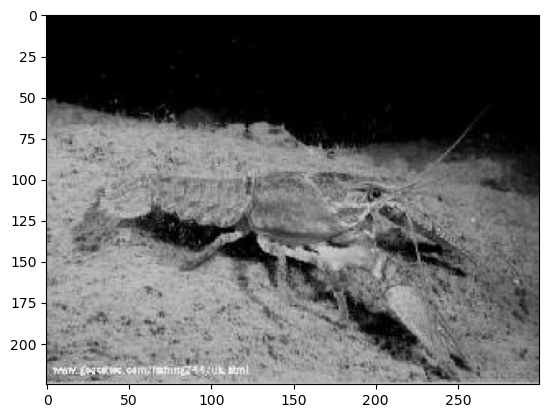

In [2]:
img_list = os.listdir("input")
print(img_list)

image = []
for i in range(len(img_list)):
    image.append(cv2.imread("input\\" + str(img_list[i]), cv2.IMREAD_GRAYSCALE))
              
img = image[0]
plt.imshow(img, cmap='gray')
plt.show();

1.2 Реалізувати функцію аугментації зображення шляхом комбінацій наступних перетворень:
* поелементне перетворення:<br>
  - інверсія яскравості пікселів
  - гамма корекція яскравості пікселів
* просторова фільтраці:
  - згладжування зображення
* геометричне перетворення:
  - перевернути зображення горизонтально/вертикально
  - переміщення зображення
  - обертання зображення
  - перекіс зображення

In [3]:
def no_axes(title = 'NONE'):
    return plt.xticks([]), plt.yticks([]), plt.title(str(title))

def show(img, cmap='gray'):# gray:чорно-білий; 
    return plt.imshow(img, cmap)

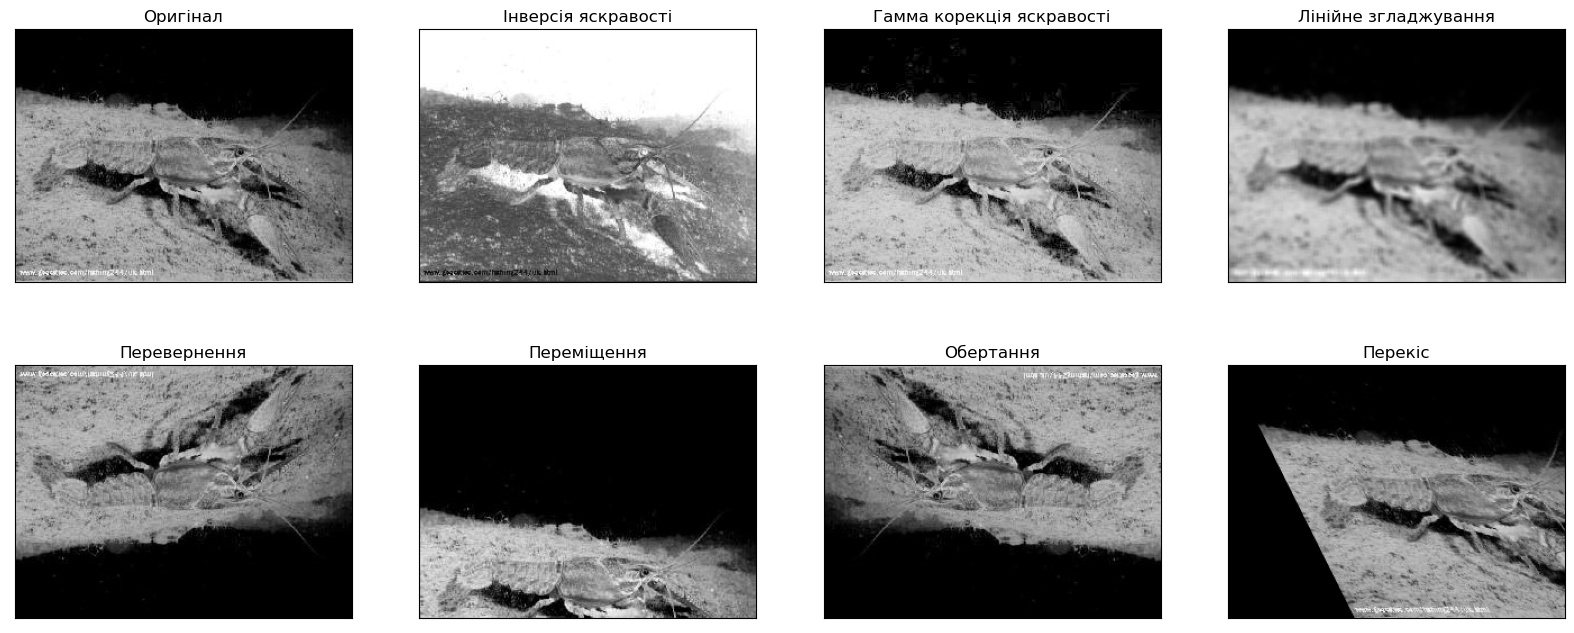

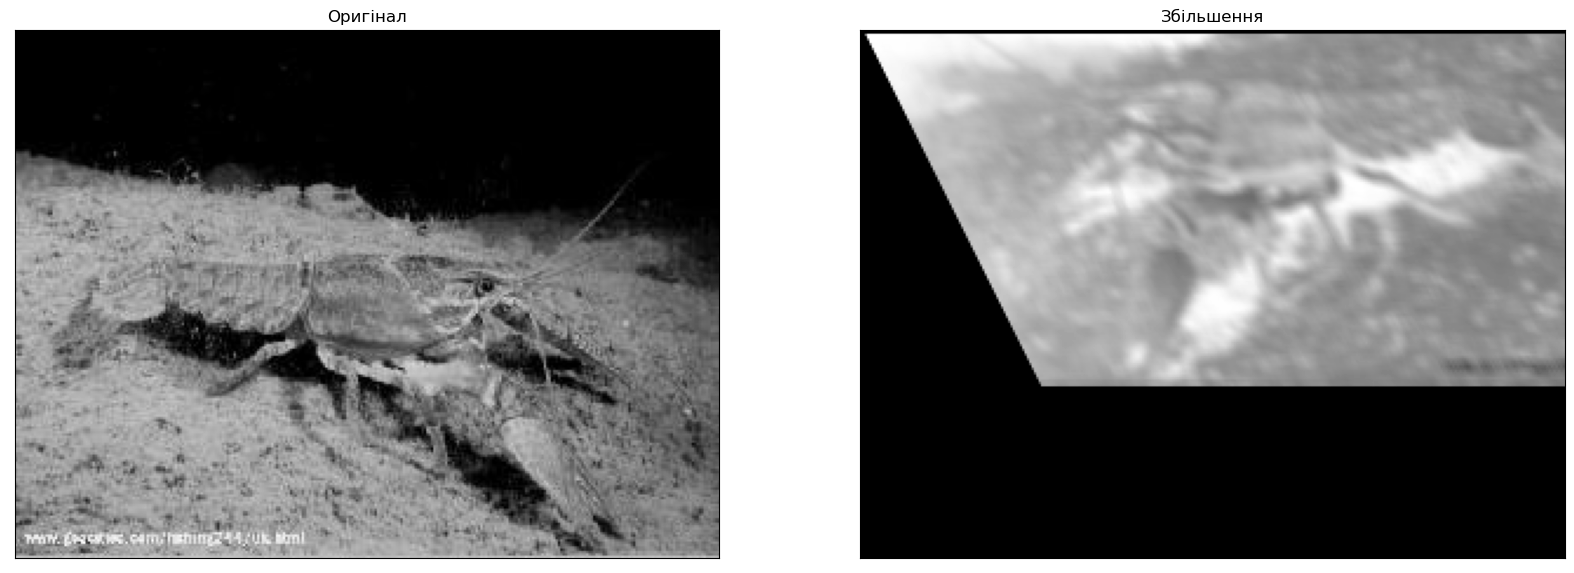

In [4]:
def brightness_inversion(img):#інверсія яскравості      
    return np.iinfo('uint8').max - 1 -img

def gamma_correction(img, gamma = 0.6, c = 1):#гамма корекція яскравості
    return (c * np.power(img, gamma) / np.max(c * np.power(img, gamma))*255).astype(np.uint8)

def linear_smoothing(img , n = 5):#лінійне згладжування n*n {3x3, 5x5, 9x9, 15x15...}
    return cv2.filter2D(img, -1, np.ones((n,n),np.float32) / (n * n))

def turning_over(img,flipCode = 0):#перевернути зображення {0:x; 1:y; -1:x,y}
    return cv2.flip(img, flipCode)

def moving(img, M = np.float32([[1, 0, 1], [0, 1, img.shape[0]/3]])):#переміщення moving - масив переміщення
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def rotate(img, angle = 180):#обертання (проти часової стрілки)
    return cv2.warpAffine(img, cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), angle, 1), (img.shape[1], img.shape[0]))

def skew(img, M = np.float32([[1,0.5,1], [0,1,1]])):
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def data_augmentation(img):
    return skew(rotate(moving(turning_over(linear_smoothing(gamma_correction(brightness_inversion(img)))))))

plt.figure(figsize=(20, 8))
plt.subplot(241),plt.imshow(img, cmap='gray'), no_axes("Оригінал")
plt.subplot(242),plt.imshow(brightness_inversion(img), cmap='gray'), no_axes("Інверсія яскравості")
plt.subplot(243),plt.imshow(gamma_correction(img), cmap='gray'), no_axes("Гамма корекція яскравості")
plt.subplot(244),plt.imshow(linear_smoothing(img), cmap='gray'), no_axes("Лінійне згладжування")
plt.subplot(245),plt.imshow(turning_over(img), cmap='gray'), no_axes("Перевернення")
plt.subplot(246),plt.imshow(moving(img), cmap='gray'), no_axes("Переміщення")
plt.subplot(247),plt.imshow(rotate(img), cmap='gray'), no_axes("Обертання")
plt.subplot(248),plt.imshow(skew(img), cmap='gray'), no_axes("Перекіс")

plt.figure(figsize=(20, 8))
plt.subplot(121),plt.imshow(img, cmap='gray'), no_axes("Оригінал")
plt.subplot(122),plt.imshow(data_augmentation(img), cmap='gray'), no_axes("Збільшення")

plt.show();

1.3 Для кожного зображення зі списку **img_list**, використовуючи функцію **data_augmentation**, виконати 10 доповнень та зберегти результат у директорії "./assignemnts/dataset":

In [5]:
j = 0
for i in image:
    cv2.imwrite("output\image_data_augmentation_" + str(j) + ".png",  data_augmentation(i))
    j+=1

## 2. Зробити перетворення перспективи вхідного зображення для визначення меж дорожньої розмітки

2.1. Відкрити та завантажити наступне зображення:
  .../test_img.jpg

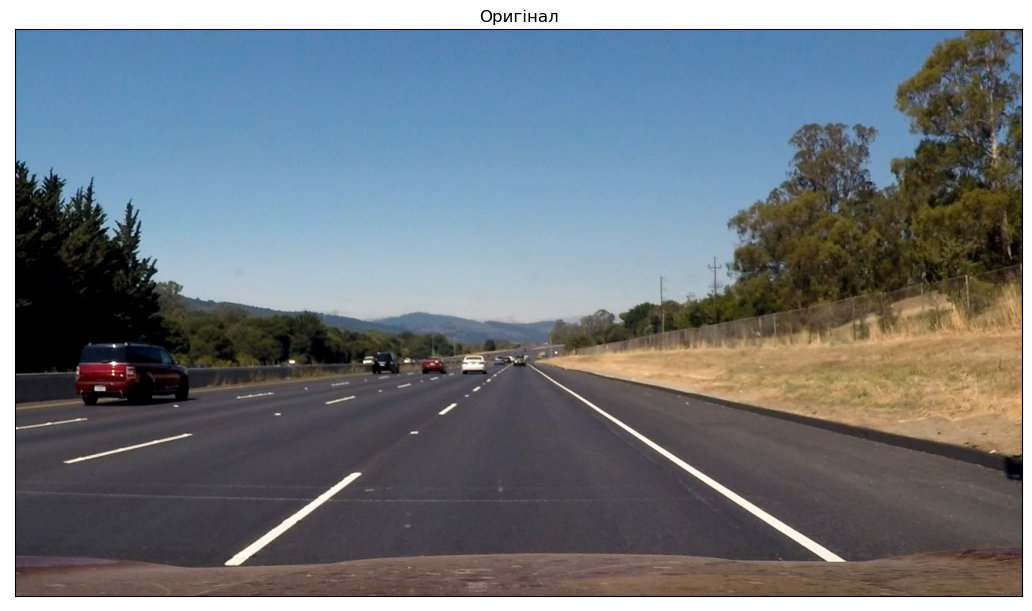

width :1280
height :720


In [6]:
img = cv2.cvtColor(cv2.imread("input/test_img.jpg"), cv2.COLOR_BGR2RGB)

height = img.shape[0]
width = img.shape[1]

plt.figure(figsize=(13, 8))
show(img), no_axes("Оригінал")
plt.show()

print("width :" + str(width) + "\nheight :" + str(height))

2.2 Задати розмір вихідного зображення:

In [7]:
OUT_IMG_WIDTH = 800
OUT_IMG_HEIGHT = 1200

2.3 Задати координати ROI вхідного зображення: 

2.4 Задати координати ROI вихідного зображення: 

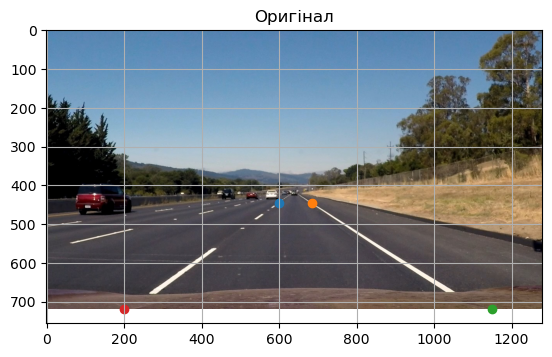

In [8]:
t1 = ([600, 445])
t2 = ([685, 445])
t3 = ([1150, 720])
t4 = ([200, 720])

src = np.float32([t1, t2, t3, t4])
dst = np.float32([[0, 0], [OUT_IMG_WIDTH, 0], [OUT_IMG_WIDTH, OUT_IMG_HEIGHT], [0, OUT_IMG_HEIGHT]])


plt.imshow(img), plt.title("Оригінал"), plt.grid()
plt.scatter(t1[0],t1[1])
plt.scatter(t2[0],t2[1])
plt.scatter(t3[0],t3[1])
plt.scatter(t4[0],t4[1])

plt.show()

2.5 Визначити матрицю перетворення перспективи

In [9]:
M = cv2.getPerspectiveTransform(src, dst)
print(M)

[[-6.08491218e-01 -8.85078136e-01  7.58954501e+02]
 [-3.95432479e-16 -3.15309086e+00  1.40312543e+03]
 [-4.88257214e-19 -2.39247684e-03  1.00000000e+00]]


2.6 Виконати перетворення перспективи

In [10]:
wraped_img = cv2.warpPerspective(img, M, (OUT_IMG_WIDTH,OUT_IMG_HEIGHT))

2.7 Відобразити вихідне зображення

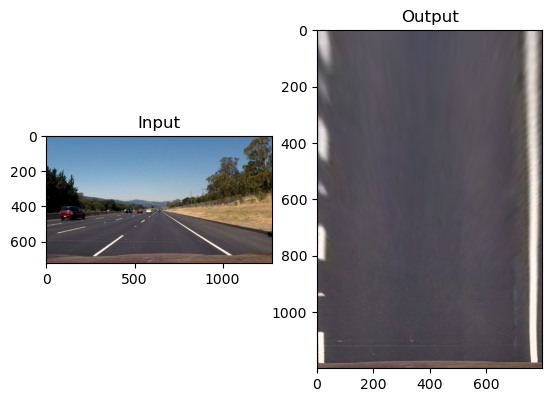

In [11]:
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(wraped_img),plt.title('Output')
plt.show()

### 3*. Реалізувати геометричне перетворення зображеннь (не використовуючи функції OpenCV)
Перетворення координат:
* афінне перетворення*
* перетворення перспективи

Інтерполяція яскравості пікселів:
* методом найближчого сусіда
* білінійна інтерполяція**
* бікубічна інтерполяція***

## Перетворення координат

### Афінне перетворення

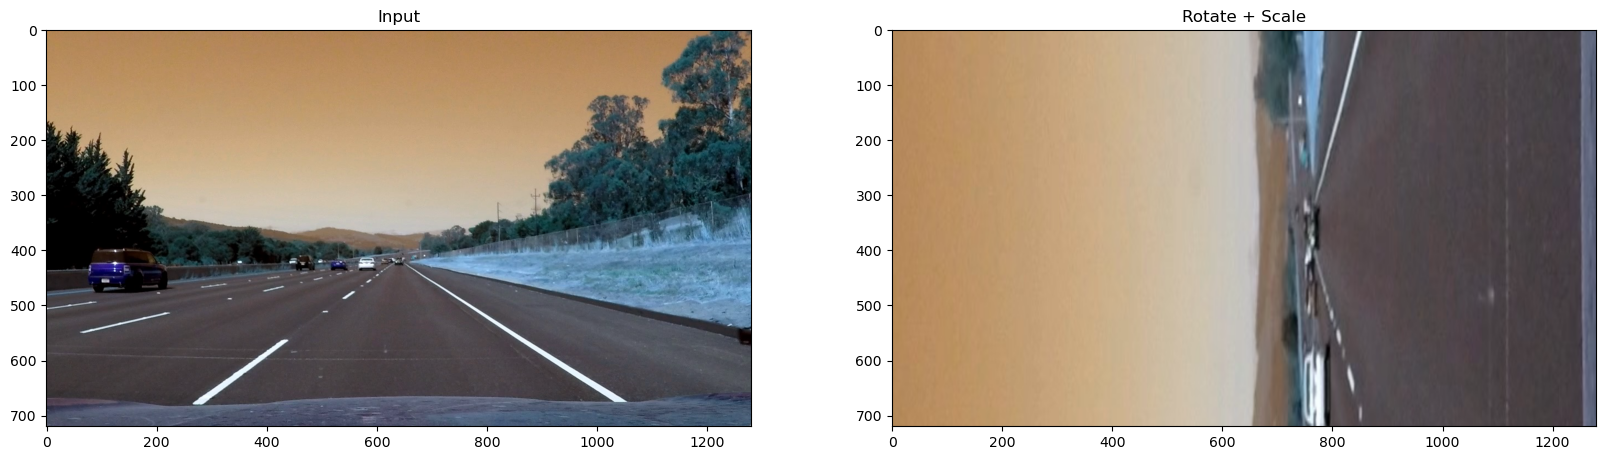

In [12]:
# def turning_over(img, axis = "x"):# перевертання відносно осі "X","Y"
#     M = np.zeros(img.shape)
    
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             if axis == "Y" or axis == "y":
#                 M[i][j] = img[i][img.shape[1] - 1 - j]
#             elif axis == "X" or axis == "x":
#                 M[i][j] = img[img.shape[0] - 1 - i][j]
#     return M

from tensorflow.keras.preprocessing.image import apply_affine_transform

img = cv2.imread("input/test_img.jpg")

apply_affine_transform(
    x = img,
    theta=0,
    tx=0,
    ty=0,
    shear=0,
    zx=1,
    zy=1,
    row_axis=0,
    col_axis=1,
    channel_axis=2,
    fill_mode='nearest',
    cval=0.0,
    order=1)

transformation = apply_affine_transform(img, theta=270, zx=0.2, zy= 0.5)

plt.figure(figsize=(20, 8))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(transformation), plt.title('Rotate + Scale')
plt.show()

### Перетворення перспективи

E:\Program\ANACONDA\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: PERSPECTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transform.PERSPECTIVE instead.
E:\Program\ANACONDA\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.


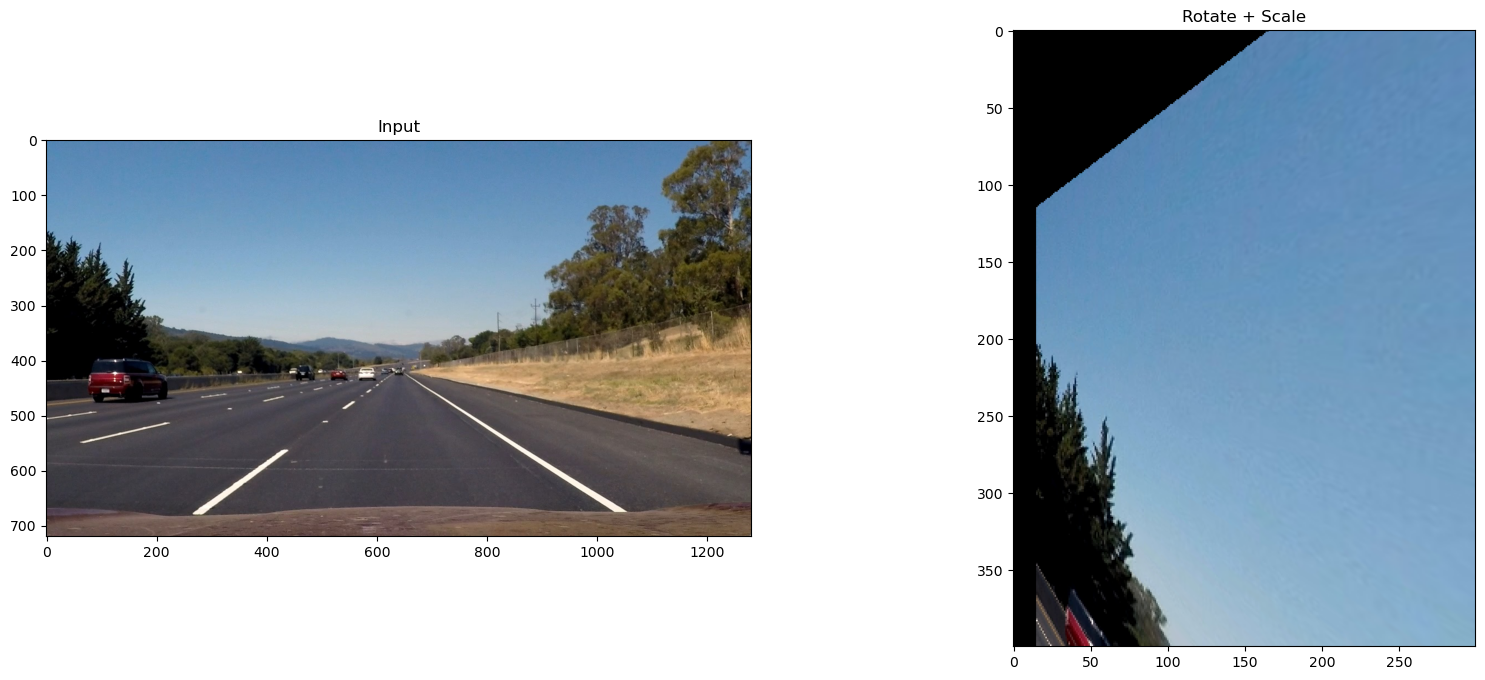

In [13]:
from PIL import Image

def find_coeffs(source_coords, target_coords):
    matrix = []
    for s, t in zip(source_coords, target_coords):
        matrix.append([t[0], t[1], 1, 0, 0, 0, -s[0]*t[0], -s[0]*t[1]])
        matrix.append([0, 0, 0, t[0], t[1], 1, -s[1]*t[0], -s[1]*t[1]])
    A = np.matrix(matrix, dtype=np.float)
    B = np.array(source_coords).reshape(8)
    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

img = Image.open("input/test_img.jpg")

coeffs = find_coeffs(
    [(0, 0), (256, 0), (256, 256), (0, 256)],
    [(15, 115), (140, 20), (140, 340), (15, 250)])

# img.transform((300, 400), Image.PERSPECTIVE, coeffs,Image.BICUBIC).show()

plt.figure(figsize=(20, 8))
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(img.transform((300, 400), Image.PERSPECTIVE, coeffs,Image.BICUBIC)), plt.title('Rotate + Scale')
plt.show()

### Методом найближчого сусіда


In [14]:

from math import floor

#----------------------------------
# Euclidian Distance
#==================================
def euclidian_dist(a,b):
    '''
    Euclidian distance between 2 points a(x_a, y_a) and b(x_b, y_b)
    Distance = Square Root ( (x_a - x_b)^2 +  (y_a - y_b)^2 )
    '''
    return np.sqrt(((a[0]-b[0])**2)+((a[1]-b[1])**2))

#----------------------------------
# Nearest Neighbour
#==================================
def near_neighbour(X,P):
    '''
    The nearest neighbour of point X(x,y) to the centroid P(x_p, y_p)
    The Neighbourhood is defined by the Upper-Left corner of the point X, which means 3 neighbours and the point X. 
    '''
    i,j = X[0],X[1]
    A = [[i,j],[i,j+1],[i+1,j],[i+1,j+1]]
    dist = [euclidian_dist(A[0],P),euclidian_dist(A[1],P),euclidian_dist(A[2],P),euclidian_dist(A[3],P)]
    minpos = dist.index(min(dist))
    return A[minpos]        

#----------------------------------
# Nearest Neighbour Interpolation
#==================================
def NN_interpolation(image, scale):
    '''
    Interpolation of the image im with scale factor scale_factor, using Nearest Neighbour.
    '''
    row, col = image.shape[0], image.shape[1]
    n_row, n_col = int(scale * row), int(scale * col)
    # fill in  img
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    for i in range(n_row):
        for j in range(n_col):
            P = [floor(float(i)/scale),floor(float(j)/scale)]
            X = [int(i) for i in P]
            zoom[i][j] = image[near_neighbour(X,P)[0]][near_neighbour(X,P)[1]]
    return zoom

def info(image, scale):
    row, col = image.shape[0], image.shape[1]
    n_row, n_col = int(scale * row), int(scale * col)
    zoom = np.arange(n_row*n_col).reshape(n_row,n_col)
    print("image size: ", image.shape, "zoom image size:", zoom.shape)

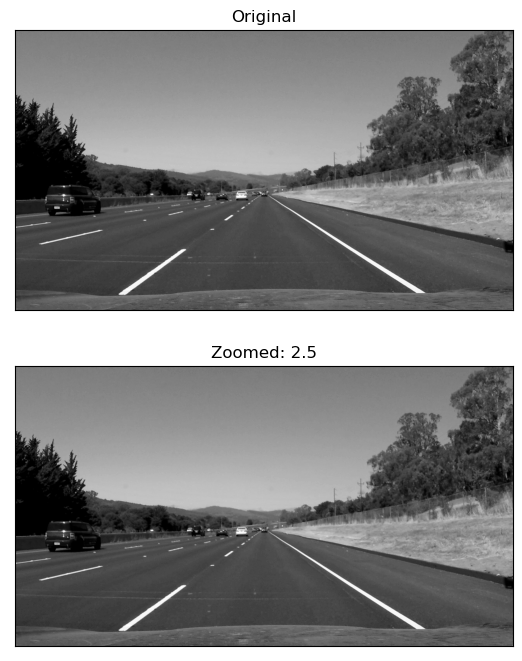

image size:  (720, 1280) zoom image size: (1800, 3200)


In [15]:
img = cv2.imread('input/test_img.jpg', cv2.IMREAD_GRAYSCALE)

scale = 2.5
Zoomed_more = NN_interpolation(img, scale)

plt.figure(figsize=(13, 8))
plt.subplot(211), show(img), no_axes('Original')
plt.subplot(212), show(Zoomed_more), no_axes('Zoomed: ' + str(scale))
plt.show()

info(img, 2.5)

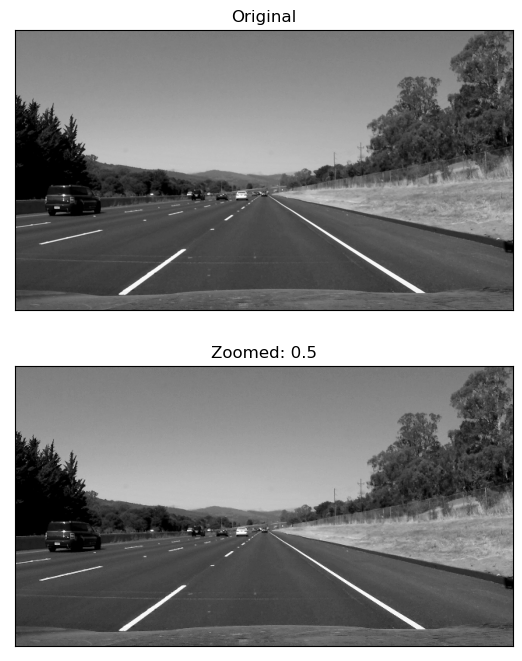

image size:  (720, 1280) zoom image size: (360, 640)


In [16]:
scale = 0.5
Zoomed_less = NN_interpolation(img, scale)

plt.figure(figsize=(13, 8))
plt.subplot(211), show(img), no_axes('Original')
plt.subplot(212), show(Zoomed_less), no_axes('Zoomed: ' + str(scale))
plt.show()

info(img, scale)

### Білінійна інтерполяція

In [17]:
def Bilinear_interpolate(img, x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    x0 = np.floor(x).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, img.shape[1]-1);
    x1 = np.clip(x1, 0, img.shape[1]-1);
    y0 = np.clip(y0, 0, img.shape[0]-1);
    y1 = np.clip(y1, 0, img.shape[0]-1);

    Ia = img[ y0, x0 ]
    Ib = img[ y1, x0 ]
    Ic = img[ y0, x1 ]
    Id = img[ y1, x1 ]

    wa = (x1-x) * (y1-y)
    wb = (x1-x) * (y-y0)
    wc = (x-x0) * (y1-y)
    wd = (x-x0) * (y-y0)

    return wa*Ia + wb*Ib + wc*Ic + wd*Id

### Бікубічна інтерполяція

In [18]:
from mpl_toolkits import mplot3d
from scipy import interpolate
import sympy as syp
import pandas as pd
pd.options.display.max_colwidth = 200
%matplotlib inline

def bicubic_interpolation(xi, yi, zi, xnew, ynew):

    # check sorting
    if np.any(np.diff(xi) < 0) and np.any(np.diff(yi) < 0) and\
    np.any(np.diff(xnew) < 0) and np.any(np.diff(ynew) < 0):
        raise ValueError('data are not sorted')

    if zi.shape != (xi.size, yi.size):
        raise ValueError('zi is not set properly use np.meshgrid(xi, yi)')

    z = np.zeros((xnew.size, ynew.size))

    deltax = xi[1] - xi[0]
    deltay = yi[1] - yi[0] 
    for n, x in enumerate(xnew):
        for m, y in enumerate(ynew):

            if xi.min() <= x <= xi.max() and yi.min() <= y <= yi.max():

                i = np.searchsorted(xi, x) - 1
                j = np.searchsorted(yi, y) - 1

                x0  = xi[i-1]
                x1  = xi[i]
                x2  = xi[i+1]
                x3  = x1+2*deltax

                y0  = yi[j-1]
                y1  = yi[j]
                y2  = yi[j+1]
                y3  = y1+2*deltay

                px = (x-x1)/(x2-x1)
                py = (y-y1)/(y2-y1)

                f00 = zi[i-1, j-1]      #row0 col0 >> x0,y0
                f01 = zi[i-1, j]        #row0 col1 >> x1,y0
                f02 = zi[i-1, j+1]      #row0 col2 >> x2,y0

                f10 = zi[i, j-1]        #row1 col0 >> x0,y1
                f11 = p00 = zi[i, j]    #row1 col1 >> x1,y1
                f12 = p01 = zi[i, j+1]  #row1 col2 >> x2,y1

                f20 = zi[i+1,j-1]       #row2 col0 >> x0,y2
                f21 = p10 = zi[i+1,j]   #row2 col1 >> x1,y2
                f22 = p11 = zi[i+1,j+1] #row2 col2 >> x2,y2

                if 0 < i < xi.size-2 and 0 < j < yi.size-2:

                    f03 = zi[i-1, j+2]      #row0 col3 >> x3,y0

                    f13 = zi[i,j+2]         #row1 col3 >> x3,y1

                    f23 = zi[i+1,j+2]       #row2 col3 >> x3,y2

                    f30 = zi[i+2,j-1]       #row3 col0 >> x0,y3
                    f31 = zi[i+2,j]         #row3 col1 >> x1,y3
                    f32 = zi[i+2,j+1]       #row3 col2 >> x2,y3
                    f33 = zi[i+2,j+2]       #row3 col3 >> x3,y3

                elif i<=0: 

                    f03 = f02               #row0 col3 >> x3,y0

                    f13 = f12               #row1 col3 >> x3,y1

                    f23 = f22               #row2 col3 >> x3,y2

                    f30 = zi[i+2,j-1]       #row3 col0 >> x0,y3
                    f31 = zi[i+2,j]         #row3 col1 >> x1,y3
                    f32 = zi[i+2,j+1]       #row3 col2 >> x2,y3
                    f33 = f32               #row3 col3 >> x3,y3             

                elif j<=0:

                    f03 = zi[i-1, j+2]      #row0 col3 >> x3,y0

                    f13 = zi[i,j+2]         #row1 col3 >> x3,y1

                    f23 = zi[i+1,j+2]       #row2 col3 >> x3,y2

                    f30 = f20               #row3 col0 >> x0,y3
                    f31 = f21               #row3 col1 >> x1,y3
                    f32 = f22               #row3 col2 >> x2,y3
                    f33 = f23               #row3 col3 >> x3,y3


                elif i == xi.size-2 or j == yi.size-2:

                    f03 = f02               #row0 col3 >> x3,y0

                    f13 = f12               #row1 col3 >> x3,y1

                    f23 = f22               #row2 col3 >> x3,y2

                    f30 = f20               #row3 col0 >> x0,y3
                    f31 = f21               #row3 col1 >> x1,y3
                    f32 = f22               #row3 col2 >> x2,y3
                    f33 = f23               #row3 col3 >> x3,y3

                px00 = (f12 - f10)/2*deltax
                px01 = (f22 - f20)/2*deltax 
                px10 = (f13 - f11)/2*deltax 
                px11 = (f23 - f21)/2*deltax

                py00 = (f21 - f01)/2*deltay
                py01 = (f22 - f02)/2*deltay
                py10 = (f31 - f11)/2*deltay
                py11 = (f32 - f12)/2*deltay

                pxy00 = ((f22-f20) - (f02-f00))/4*deltax*deltay
                pxy01 = ((f32-f30) - (f12-f10))/4*deltax*deltay
                pxy10 = ((f23-f21) - (f03-f01))/4*deltax*deltay
                pxy11 = ((f33-f31) - (f13-f11))/4*deltax*deltay


                f = np.array([p00,  p01,  p10, p11,
                              px00,  px01,  px10, px11,
                              py00, py01,  py10,  py11,
                              pxy00,  pxy01, pxy10, pxy11])

                a = A@f

                a = a.reshape(4,4).transpose()
                z[n,m] = np.array([1, px, px**2, px**3]) @ a @ np.array([1, py, py**2, py**3])

    return z